In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
% matplotlib inline

In [240]:
file1="/Users/wen/Desktop/CPP/Course Project/Trading Data/amzn_1224.csv"

In [241]:
data=pd.read_csv(file1,names=['Date',"Time",'Open','High','Low','Close','Vplume','x_0','x_1','x_2'])

In [242]:
del data['x_0']

In [243]:
del data['x_1']
del data['x_2']

In [244]:
data['MA_5']=data['Close'].rolling(5).mean()
data['MA_10']=data['Close'].rolling(10).mean()
data['MA_15']=data['Close'].rolling(15).mean()
data['MA_20']=data['Close'].rolling(20).mean()
data['MA_30']=data['Close'].rolling(30).mean()
data['MA_45']=data['Close'].rolling(45).mean()
data['MA_65']=data['Close'].rolling(65).mean()
data['MA_90']=data['Close'].rolling(90).mean()

In [246]:
def signals(df,short='MA_20',long='MA_30'):
    return df[short]>df[long]

In [247]:
data['Comparison'] = data.apply(signals,axis=1,short='MA_20',long='MA_30')

In [248]:
def execution(df):
    df['Buy']=0
    df['Sell']=0
    for i in range(1,df.shape[0]):
        if (df.loc[i,'Comparison']^df.loc[i-1,'Comparison']):
            if (df.loc[i,'Comparison']):
                df.loc[i,'Buy']=1
            else:
                df.loc[i,'Sell']=1
execution(data)

In [249]:
data['Buy'].sum(),data['Sell'].sum()

(15, 15)

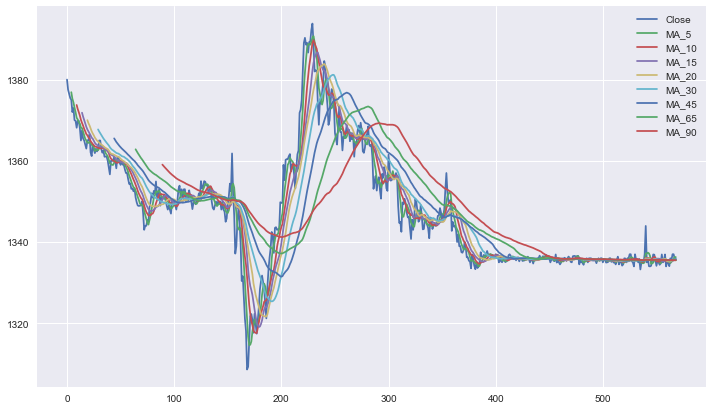

In [250]:
# eg MA_15 means 15 minutes moving average
plt.figure(figsize=(12,7))
plt.plot(range(data.shape[0]),data['Close'],label='Close')
plt.plot(range(data.shape[0]),data['MA_5'],label='MA_5')
plt.plot(range(data.shape[0]),data['MA_10'],label='MA_10')
plt.plot(range(data.shape[0]),data['MA_15'],label='MA_15')
plt.plot(range(data.shape[0]),data['MA_20'],label='MA_20')
plt.plot(range(data.shape[0]),data['MA_30'],label='MA_30')
plt.plot(range(data.shape[0]),data['MA_45'],label='MA_45')
plt.plot(range(data.shape[0]),data['MA_65'],label='MA_65')
plt.plot(range(data.shape[0]),data['MA_90'],label='MA_90')
plt.legend()
plt.show()

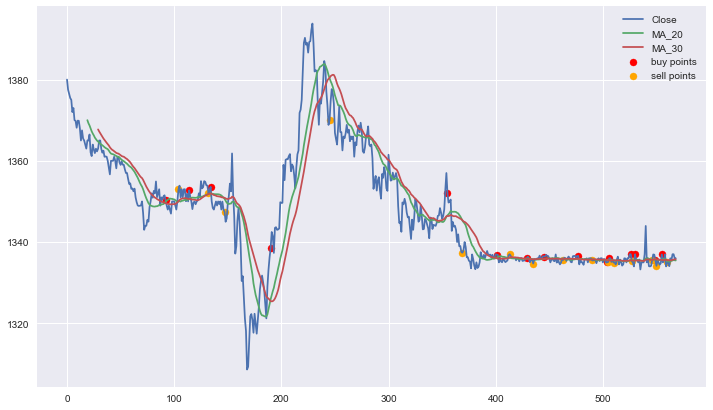

In [251]:
buy_points = np.where(data['Buy']==1)
sell_points = np.where(data['Sell']==1)
buy_price = data['Close'].values[buy_points[0]]
sell_price = data['Close'].values[sell_points[0]]
plt.figure(figsize=(12,7))
plt.plot(range(data.shape[0]),data['Close'],label='Close')
plt.plot(range(data.shape[0]),data['MA_20'],label='MA_20')
plt.plot(range(data.shape[0]),data['MA_30'],label='MA_30')
plt.scatter(buy_points,buy_price,s=50,c='red',label='buy points')
plt.scatter(sell_points,sell_price,s=50,c='orange',label='sell points')
plt.legend()
plt.show()

In [252]:
# Take the data on 2018-12-24 for an example:
# Calculate the P&L below:
(sell_price-buy_price).sum() # 2.12 is in accordance with the back test result in C++ project

2.1200000000001182